In [3]:
library(bsts)

In [5]:
jd = read.csv('jcdata.csv', head = T) 
jd1 = read.csv('jcdata_new.csv', head=T)

In [7]:
jd
jd1

Date,Sales,Intent,Spend,SpendZ,IntentZ
1,74340.71,21.91,545664.31,0.04137918,-0.83895905
2,113533.76,18.88,607878.90,0.18382426,-1.33424320
3,140037.02,22.86,1396676.84,1.98983781,-0.68367194
4,69381.41,16.45,604576.71,0.17626365,-1.73145129
5,91231.26,22.04,50865.61,-1.09150050,-0.81770924
6,111881.62,24.01,128123.82,-0.91461189,-0.49569281
7,139031.59,30.44,43473.00,-1.10842645,0.55535575
8,144009.79,22.41,702704.00,0.40093362,-0.75722899
9,210135.72,22.15,986849.00,1.05150545,-0.79972862
10,93679.79,36.99,676841.19,0.34171873,1.62601951


Intent,Spend
32,532000
32,532000
32,532000
33,532000
33,532000
33,532000
34,532000
34,532000
34,532000
35,532000


In [8]:
ss <- AddLocalLinearTrend(list(), jd$Sales)

In [9]:
#model with predictors
model3 <- bsts(Sales ~ Intent + Spend, state.specification = ss, data = jd,  niter = 1000, na.action=na.omit)

=-=-=-=-= Iteration 0 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Nov 15 13:35:20 2018
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Nov 15 13:35:21 2018
 =-=-=-=-=


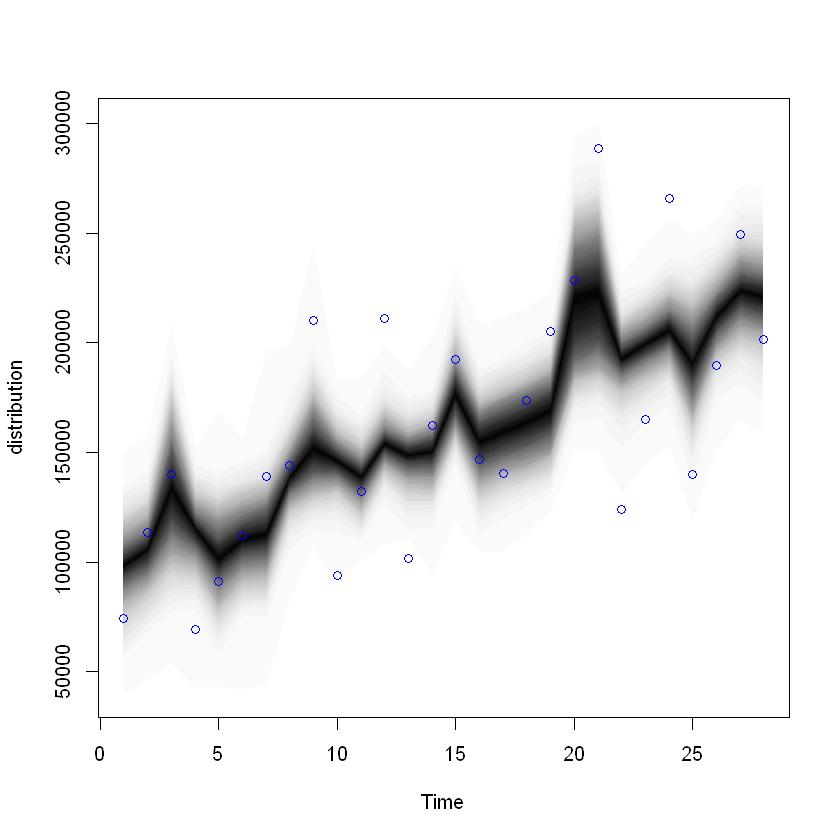

In [10]:
plot(model3)

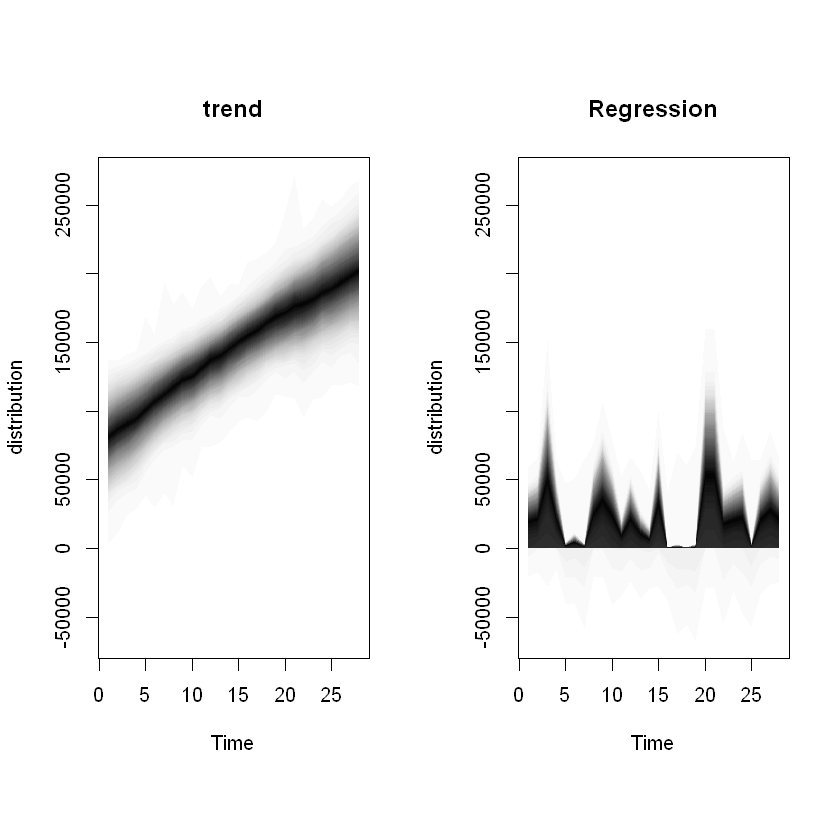

In [16]:
plot(model3, "comp")

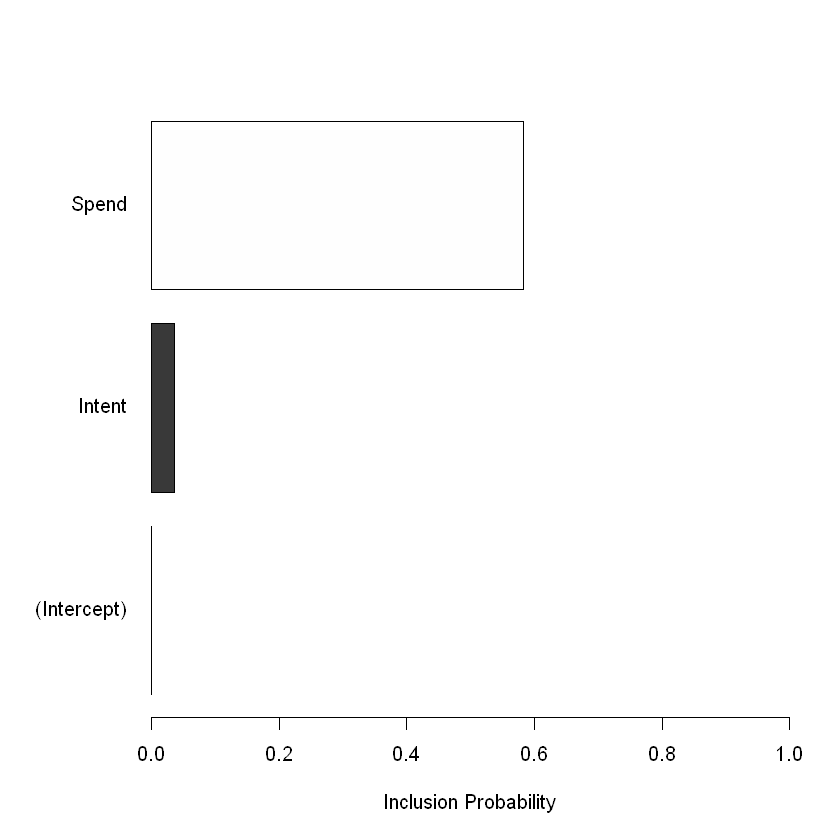

In [11]:
plot(model3, "coef")

In [12]:
#model with no predictors 
model <- bsts(jd$Sales, state.specification = ss, data = jd,  niter = 1000)

=-=-=-=-= Iteration 0 Thu Nov 15 13:36:45 2018
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Nov 15 13:36:45 2018
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Nov 15 13:36:45 2018
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Nov 15 13:36:45 2018
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Nov 15 13:36:46 2018
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Nov 15 13:36:46 2018
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Nov 15 13:36:46 2018
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Nov 15 13:36:46 2018
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Nov 15 13:36:46 2018
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Nov 15 13:36:46 2018
 =-=-=-=-=


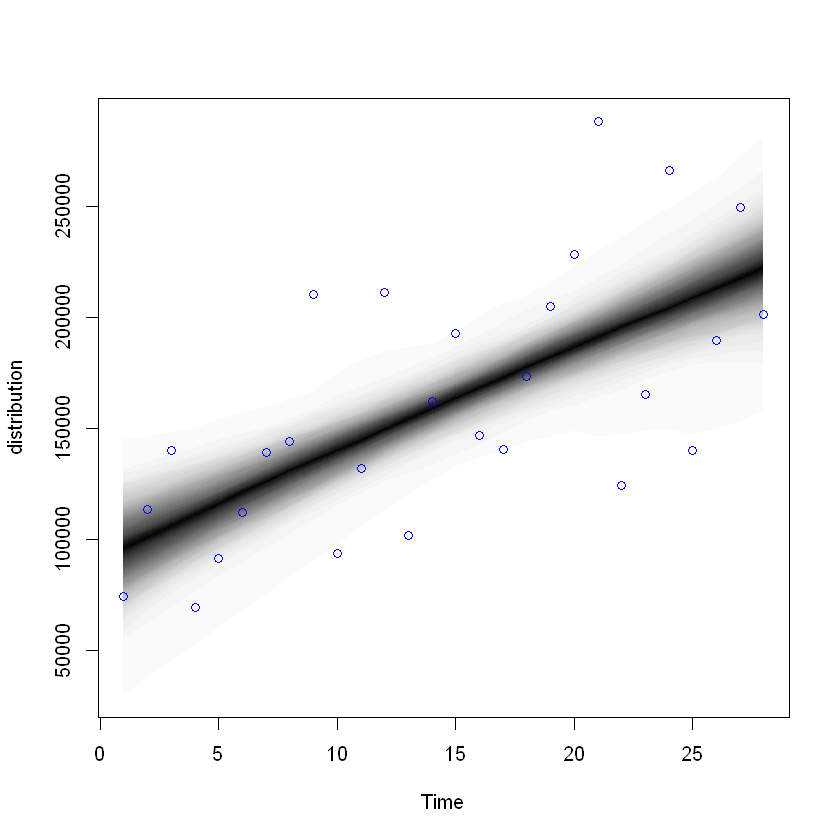

In [13]:
plot(model)

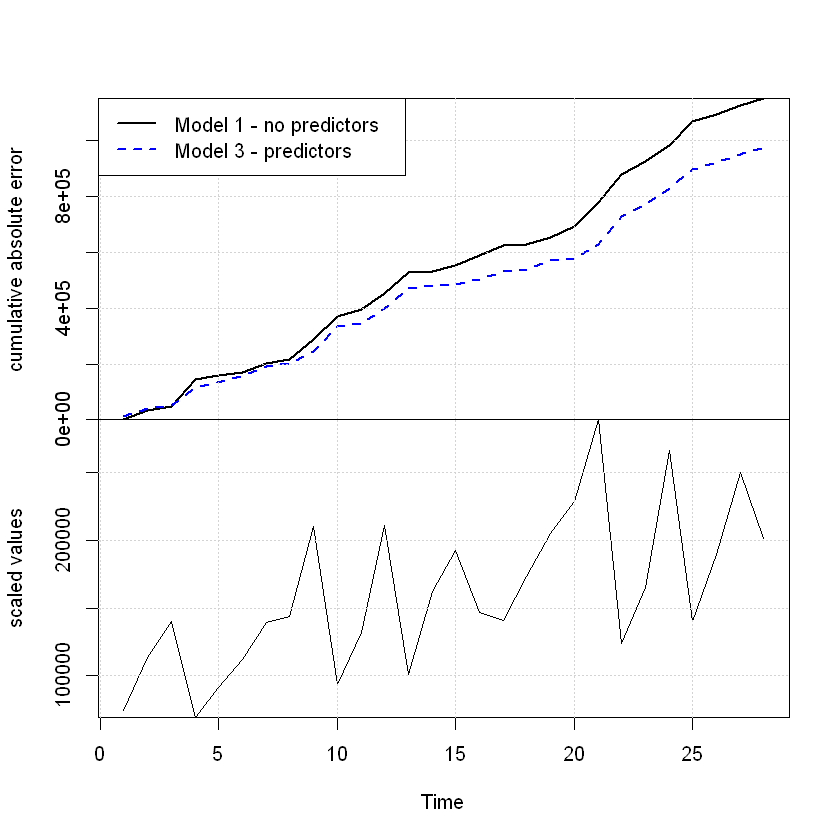

In [15]:
CompareBstsModels(list("Model 1 - no predictors" = model, "Model 3 - predictors" = model3), colors = c("black", "blue"))

In [21]:
pred = predict(model3, newdata=jd1, horizon = 12, na.action=na.omit)

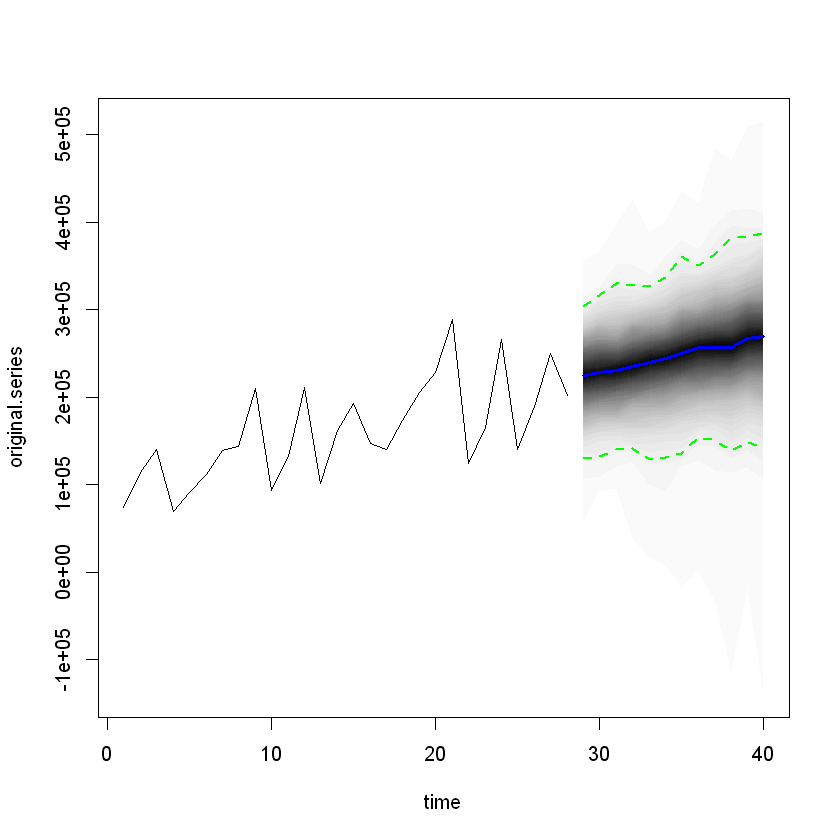

In [22]:
plot(pred)

In [24]:
pred1 = predict(model, horizon =12)

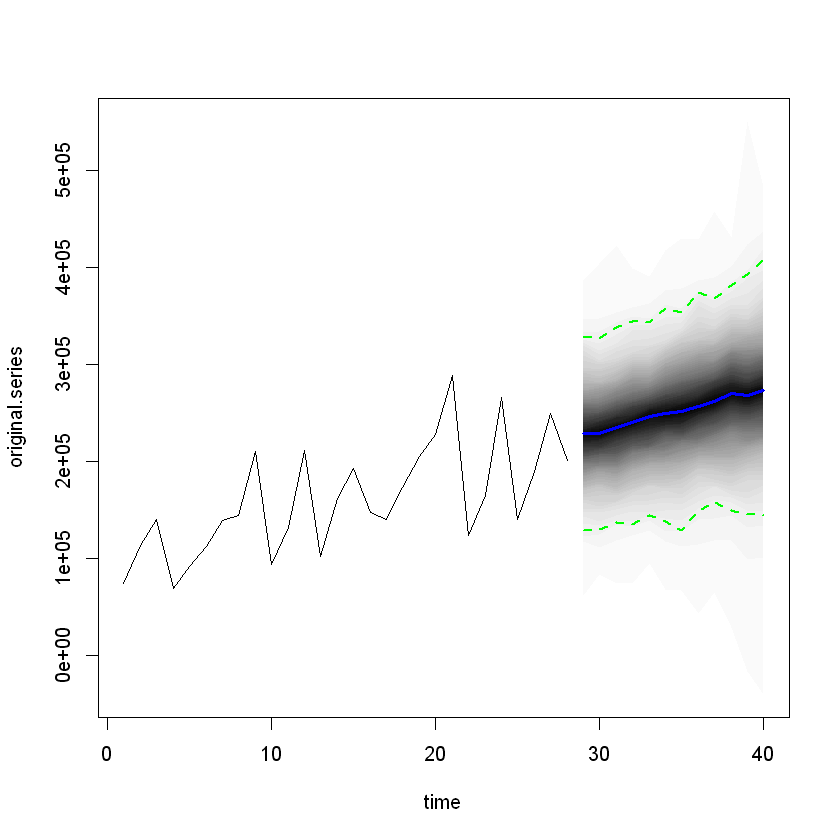

In [25]:
plot(pred1)